# 数据集信息统计
分配比例： 80% 训练集、10% 验证集、10% 测试集。

* txt_path:`/home/hcq/data/2022anno/finaul_result/txt_result`

## 1 统计label分类数量

In [6]:
import os
import numpy as np

txt_path = "/home/hcq/data/2022anno/finaul_result/txt_result"

txt_list = os.listdir(txt_path)
# list_json = os.listdir('%s/%s/livox/'%(i,j))
# print(txt_list)
num_list = [int(x.split('.')[0]) for x in txt_list] # 只
num_list.sort()
# print(num_list)
labels = ['Truck','Auxiliary','Car','Excavator','Widebody','Pedestrian']
# num_objects_Truck = 0
# num_objects_Auxiliary = 0
# num_objects_Car = 0
# num_objects_Excavator = 0
# num_objects_Widebody = 0
# num_objects_Pedestrian = 0

# 字符串生成变量
for label in labels:
    label = "num_objects_" + label 
    exec(f"{label} = 0") #  字符串生成变量


for i in txt_list:
    txt_file =  "%s/%s"%(txt_path, i)
    with open(txt_file, 'r') as f: # 
        lines = f.readlines() # 打开文件
    content = [line.strip().split(' ') for line in lines] # GT内容================================
    num_objects_Truck += len([x[0] for x in content if x[0] == 'Truck']) # label数值
    num_objects_Auxiliary += len([x[0] for x in content if x[0] == 'Auxiliary'])
    num_objects_Car += len([x[0] for x in content if x[0] == 'Car'])
    num_objects_Excavator += len([x[0] for x in content if x[0] == 'Excavator'])
    num_objects_Widebody += len([x[0] for x in content if x[0] == 'Widebody'])
    num_objects_Pedestrian += len([x[0] for x in content if x[0] == 'Pedestrian'])
print("Truck: %d,Auxiliary: %d,Car: %d,Excavator: %d,Widebody: %d,Pedestrian: %d"
%(num_objects_Truck, num_objects_Auxiliary, num_objects_Car, num_objects_Excavator, num_objects_Widebody, num_objects_Pedestrian))

Truck: 2432,Auxiliary: 362,Car: 364,Excavator: 357,Widebody: 299,Pedestrian: 130


## 2 统计各个label的平均whl

In [7]:
import os
import numpy as np

# txt_path = "/home/hcq/data/2022anno/finaul_result/txt_result"
txt_path = "/home/hcq/data/2022anno/finaul_result/txt_result"
txt_list = os.listdir(txt_path)

labels = ['Truck','Auxiliary','Car','Excavator','Widebody','Pedestrian']


# 字符串生成变量
for label in labels:
    for var in ['l', 'w', 'h']:
        exec('{}_{} = 0'.format(label, var)) #  字符串生成变量

var2pos = {'l':4, 'w':5, 'h':6}

for i in txt_list:
    txt_file =  "%s/%s"%(txt_path, i)
    with open(txt_file, 'r') as f: # 
        lines = f.readlines() # 打开文件
    content = [line.strip().split(' ') for line in lines] # GT内容
    for label in labels:
        for var in ['l', 'w', 'h']:
            exec("{}_{} += sum([float(x[var2pos[var]]) for x in content if x[0] == label])".format(label, var))

for label in labels:
    result = []
    for var in ['l', 'w', 'h']:
        exec('{}_{} /= num_objects_{}'.format(label, var, label))
        exec('result.append({}_{})'.format(label, var))   
    
    print("The average size of all %s is " %label, result)

The average size of all Truck is  [12.939171936477653, 7.971810845357639, 7.122084794393413]
The average size of all Auxiliary is  [15.09597229965678, 5.924453423796027, 5.880182101596923]
The average size of all Car is  [5.241168263842723, 2.0673137431804074, 1.9286726650508481]
The average size of all Excavator is  [17.533350036741094, 14.855893846266419, 13.490300184190234]
The average size of all Widebody is  [9.603223551494379, 3.2569904904066806, 3.7452632433311805]
The average size of all Pedestrian is  [0.575541939201429, 0.7169653032212128, 1.7697762654658924]



## 3 统计各个label的xy距离的数量

In [8]:
import os
import numpy as np

txt_path = "/home/hcq/data/2022anno/finaul_result/txt_result"

txt_list = os.listdir(txt_path)
# list_json = os.listdir('%s/%s/livox/'%(i,j))
# print(txt_list)
num_list = [int(x.split('.')[0]) for x in txt_list] # 只
num_list.sort()
# print(num_list)
labels = ['Truck','Auxiliary','Car','Excavator','Widebody','Pedestrian']

all_objects_list ={1:[],2:[],3:[],4:[],5:[],6:[]} # label -> list
idx_2_name = {1: 'Truck', 2: 'Auxiliary', 3: 'Car', 4: 'Excavator', 5: 'Widebody', 6: 'Pedestrian'}
# 字符串生成变量
for label in labels:
    label = "num_objects_" + label 
    exec(f"{label} = 0") #  字符串生成变量

# 1 txt转成list
content_all = []
for i in txt_list:
    txt_file =  "%s/%s"%(txt_path, i)
    with open(txt_file, 'r') as f: # 
        lines = f.readlines() # 打开文件
    content_all += [line.strip().split(' ') for line in lines] # GT内容================================n
    # ['Car', '85.30741333331932', '10.757964036888517', '-1.4611711340805718', '5.4900554622328475', '2.163626883607607', '1.8996643867674325', '3.003558193094035', '1']
# 处理 
print("总label 数量: %d"%len(content_all))
# print(content_all[0])

# 2 list抓转成包含list的字典
for i in range(6):
    for content in content_all:
        if content[0] == idx_2_name[i+1]:
            content = [float(x) if x not in labels else x for x in content[0:-1]] # 批量将列表元素转换为数字
            # print(content)
            all_objects_list[i+1].append(content)  

# print(all_objects_list[1])
# list转成字典
label_objects_dict = {} # label (int) -> objects (np.array)
for i in range(6):
    print("Number of {} : {}".format(idx_2_name[i+1], len(all_objects_list[i+1])))
    label_objects_dict[i+1] = np.array(all_objects_list[i+1])

label_objects_dict[1]

总label 数量: 3944
Number of Truck : 2432
Number of Auxiliary : 362
Number of Car : 364
Number of Excavator : 357
Number of Widebody : 299
Number of Pedestrian : 130


array([['Truck', '40.6204709628143', '30.112521767688428', ...,
        '8.54336439349427', '7.770403982998657', '2.903644384721382'],
       ['Truck', '82.68797800820352', '10.484007390853666', ...,
        '8.803317296575099', '7.866589377695227', '2.6487280646531546'],
       ['Truck', '129.11577063182355', '-6.018513128463867', ...,
        '8.782169218249724', '7.728564356701544', '-0.11694605861549802'],
       ...,
       ['Truck', '132.58392638015945', '67.12286440416283', ...,
        '6.508976047382993', '6.473430496050261', '-1.8921242705083332'],
       ['Truck', '100.16482519742468', '65.0639068634825', ...,
        '6.489734537762171', '6.533411305827718', '-0.05817764016075106'],
       ['Truck', '104.8229085128056', '-5.968638132111602', ...,
        '8.376048620639764', '5.470450300736305', '-0.0656983488626178']],
      dtype='<U22')

2432
362
364
357
299
130


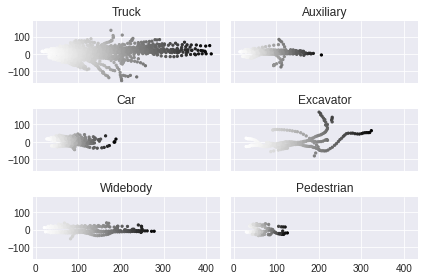

In [9]:

import matplotlib.pyplot as plt
fig2, ax2 = plt.subplots(3,2,sharex=True, sharey=True)

for i in range(6):
    objects_label = idx_2_name[i+1]
    objects_arr = label_objects_dict[i+1]
    
    print(len(objects_arr))
    # print(objects_arr[:,1])
    # x = objects_arr[:,1]
    # y = objects_arr[:,2]
    x = np.array([float(x)  for x in objects_arr[:,1]]) #字符串转数字
    y = np.array([float(x)  for x in objects_arr[:,2]])
    z = np.sqrt(x**2 + y**2) # 颜色
    ax2[i//2,i%2].scatter(x, y, s=20, c=z, marker=".")
    ax2[i//2,i%2].set_title(objects_label)
    # ax2[i//2,i%2].set_xlabel('x')
    # ax2[i//2,i%2].set_ylabel('y')
# plt.style.use('seaborn-darkgrid') # 设置画图的风格 
plt.tight_layout()
plt.show()

###  truck analysis

In [87]:
# truck analysis
trucks = label_objects_dict[1]
print(np.min(trucks[1:500,1:4], 0))
print(np.max(trucks[500:1000,1:4], 0))
print(np.max(trucks[1000:1500,1:4], 0))
print(np.max(trucks[1500:2000,1:4], 0))

print(np.percentile(trucks[:,1:2], 30))
print(np.median(trucks[:,1:2]))

[-144.30028725   -8.62759004    9.35825579]
[108.35022609  17.38143983  16.17645665]
[81.27092774 19.19783119 16.17645665]
[96.66013216 14.88144052 16.17645665]
-2.288263113637343
12.588830526444967


# 数据集信息统计
分配比例： 80% 训练集、10% 验证集、10% 测试集。

* txt_path:`/home/hcq/data/2022anno/finaul_result/txt_result`


## 划分(train val test)并保存成txt文件
*  80% 训练集、10% 验证集、10% 测试集。
* train_set val_set test_set

In [2]:
import os
import numpy as np
import random

txt_path = "/home/hcq/data/2022anno/finaul_result/txt_result_180filter" # 180m过滤后的txt标注文件

txt_list = os.listdir(txt_path)
# list_json = os.listdir('%s/%s/livox/'%(i,j))
# print(txt_list)
num_list = [int(x.split('.')[0]) for x in txt_list] # 只
num_list.sort()
# 1打乱顺序====================================
# random.shuffle(num_list)

# 2分离各自数据集2242===========================================================================================================
print("txt 文件数量：", len(num_list)) # 2242
# train_list = num_list[0:2000]
# train_list.sort()
# val_list = num_list[2000:2250]
# val_list.sort()
# test_list = num_list[2250:]
# test_list.sort()

# 去除180m外的结果
# train_list = num_list[0:1794]
# train_list.sort()
# val_list = num_list[1794:]
# val_list.sort()
# test_list = num_list[1794:]
# test_list.sort()

# 测试均匀 no shuffle
train_list = num_list[0:650] + num_list[1200:] + num_list[850:900]
# print(train_list)
train_list.sort()
# val_list = num_list[750:1000] # target
# val_list = num_list[650:1200] # target
val_list = num_list[650:850] + num_list[900:1200] # target
val_list.sort()
# test_list = num_list[400:750] # only truck Auxiliary===============================
# test_list = num_list[850:950] #  widebody &Truck=================================
test_list = num_list[650:850] + num_list[900:1200] #  widebody
test_list.sort()


# print("train_list:%d \nval_list:%d \ntest_list:%d "%(len(train_list), len(val_list),len(test_list) ))

# 3 分别保存各自文件名到txt文件中
train_list = ['%06d'%x for x in train_list] # 数字转成字符
val_list = ['%06d'%x for x in val_list] # 数字转成字符
test_list = ['%06d'%x for x in test_list] # 数字转成字符
# 数据集字典
dataset = {}
dataset['train'] = train_list
dataset['val'] = val_list
dataset['test'] = test_list
print("train_list:%d \nval_list:%d \ntest_list:%d "%(len(train_list), len(val_list),len(test_list) ))

# save
for key in dataset:
    print(key)
    # print(key,':', dataset[key])
    # if key != "test": continue
    fo = open("%s.txt"%(key), "w")
    for item in dataset[key]:
        fo.write(str(item) + "\n")
    fo.close() # 必须要加,不然会有txt文件数据为空!!!
print("Txt file saved! successful!!!")

txt 文件数量： 2242
train_list:1742 
val_list:500 
test_list:500 
train
val
test
Txt file saved! successful!!!


## 各类别的数量

In [4]:
# 可视化 train_set val_set test_set各自label
class_path = "/home/hcq/pointcloud/Python/data_process"
# txt_path = "/home/hcq/data/2022anno/finaul_result/txt_result"
txt_path = "/home/hcq/data/2022anno/finaul_result/txt_result_180filter" # 180m过滤后的txt标注文件

labels = ['Truck','Auxiliary','Car','Excavator','Widebody','Pedestrian']
# 创建一个元素都为0的列表：
l=6
all_class = [0]*l
train_class = [0]*l
val_class = [0]*l
test_class = [0]*l
# 
txt_dict = ['train', 'val', 'test']
# 打开文件
for i in txt_dict:
    txt_file = "%s/%s.txt"%(class_path, i) # train.txt
    with open(txt_file, 'r') as f: # 
        lines = f.readlines() # 打开文件
    txt_path_list = [line.strip().split(' ')[0] for line in lines] # GT内容
    # print(txt_path_list)
    # 打开label文件
    for j in txt_path_list:
        if i == "train":
            txt_file = "%s/%s.txt"%(txt_path, j) # 
            with open(txt_file, 'r') as f: # 
                lines = f.readlines() # 打开文件
            content = [line.strip().split(' ') for line in lines] # GT内容
            train_class[0] += len([x[0] for x in content if x[0] == 'Truck']) # label数值
            train_class[1] += len([x[0] for x in content if x[0] == 'Auxiliary'])
            train_class[2] += len([x[0] for x in content if x[0] == 'Car'])
            train_class[3] += len([x[0] for x in content if x[0] == 'Excavator'])
            train_class[4] += len([x[0] for x in content if x[0] == 'Widebody'])
            train_class[5] += len([x[0] for x in content if x[0] == 'Pedestrian'])
        if i == "val":
            txt_file = "%s/%s.txt"%(txt_path, j) # 
            with open(txt_file, 'r') as f: # 
                lines = f.readlines() # 打开文件
            content = [line.strip().split(' ') for line in lines] # GT内容
            val_class[0] += len([x[0] for x in content if x[0] == 'Truck']) # label数值
            val_class[1] += len([x[0] for x in content if x[0] == 'Auxiliary'])
            val_class[2] += len([x[0] for x in content if x[0] == 'Car'])
            val_class[3] += len([x[0] for x in content if x[0] == 'Excavator'])
            val_class[4] += len([x[0] for x in content if x[0] == 'Widebody'])
            val_class[5] += len([x[0] for x in content if x[0] == 'Pedestrian'])
        if i == "test":
            txt_file = "%s/%s.txt"%(txt_path, j) # er
            with open(txt_file, 'r') as f: # 
                lines = f.readlines() # 打# kesk开文件
            content = [line.strip().split(' ') for line in lines] # GT内容
            test_class[0] += len([x[0] for x in content if x[0] == 'Truck']) # label数值
            test_class[1] += len([x[0] for x in content if x[0] == 'Auxiliary'])
            test_class[2] += len([x[0] for x in content if x[0] == 'Car'])
            test_class[3] += len([x[0] for x in content if x[0] == 'Excavator'])
            test_class[4] += len([x[0] for x in content if x[0] == 'Widebody'])
            test_class[5] += len([x[0] for x in content if x[0] == 'Pedestrian'])
print("train_class: %s\n val_class: %s\n test_class: %s"%(train_class,val_class,test_class))
all_class = np.sum([train_class, val_class], axis=0).tolist() # 修改=======================================
print(all_class)

# 可视化
# /home/hcq/pointcloud/python-libraries/03Matplotlib/应用/柱状图.ipynb
''' 
train_class: [1928, 293, 288, 291, 225, 90]
val_class: [239, 41, 38, 23, 43, 16]
test_class: [265, 30, 36, 43, 31, 24]

'''



train_class: [1542, 291, 295, 206, 141, 91]
 val_class: [417, 68, 65, 67, 49, 39]
 test_class: [417, 68, 65, 67, 49, 39]
[1959, 359, 360, 273, 190, 130]


' \ntrain_class: [1928, 293, 288, 291, 225, 90]\nval_class: [239, 41, 38, 23, 43, 16]\ntest_class: [265, 30, 36, 43, 31, 24]\n\n'

## (train val test)各label可视化

NameError: name 'all_class' is not defined

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


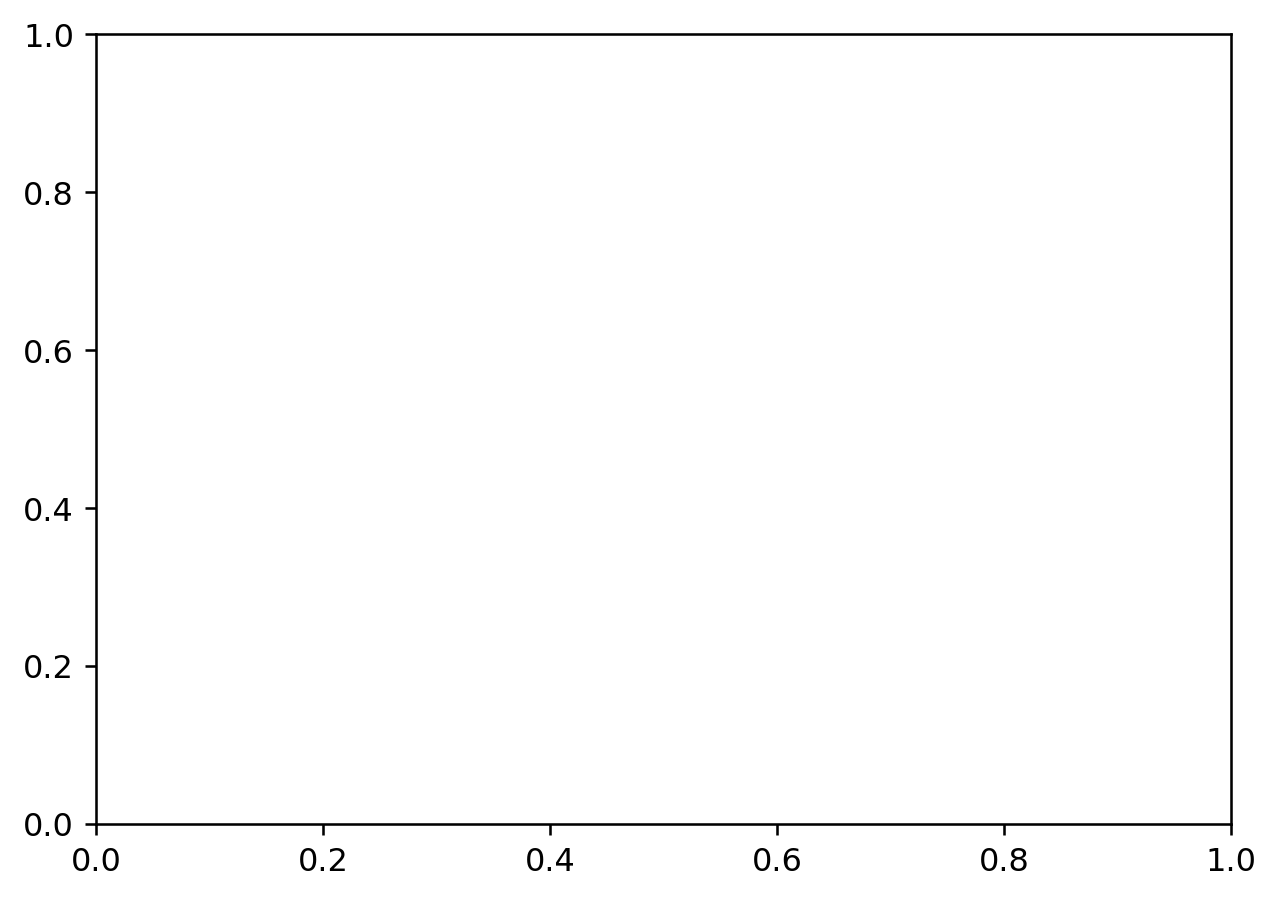

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import *  # 支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 创建一个点数为 8 x 6 的窗口, 并设置分辨率为 250像素/每英寸
plt.figure(figsize=(14, 10), dpi=230)


#plot 1:===============================
plt.subplot(2, 2, 1)
x = np.array(['Truck','Auxiliary','Car','Excavator','Widebody','Pedestrian'])
y = np.array(all_class) # 修改！！！！！！！！！！！！！！！！！

plt.bar(x, y,  color = ["#4CAF50","red","hotpink","#556B2F","green","blue"])

#使用text显示数值  
for a,b in zip(x,y):  
 plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)

plt.xlabel("Label")  #设置X轴Y轴名称  
plt.ylabel("Number")  
plt.title("all set(总数量可能有变化)", fontsize=14)
plt.style.use('seaborn-darkgrid') # 设置画图的风格 


#plot 2:===============================
plt.subplot(2, 2, 2)
x = np.array(['Truck','Auxiliary','Car','Excavator','Widebody','Pedestrian'])
y = np.array(train_class)

plt.bar(x, y,  color = ["#4CAF50","red","hotpink","#556B2F","green","blue"])

#使用text显示数值  
for a,b in zip(x,y):  
 plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)

plt.xlabel("Label")  #设置X轴Y轴名称  
plt.ylabel("Number")  
plt.title("train set", fontsize=14) # # fontproperties 设置中文显示，fontsize 设置字体大小
plt.style.use('seaborn-darkgrid') # 设置画图的风格 

#plot 3:===============================
plt.subplot(2, 2, 3)
x = np.array(['Truck','Auxiliary','Car','Excavator','Widebody','Pedestrian'])
y = np.array(val_class)

plt.bar(x, y,  color = ["#4CAF50","red","hotpink","#556B2F","green","blue"])

#使用text显示数值  
for a,b in zip(x,y):  
 plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)

plt.xlabel("Label")  #设置X轴Y轴名称  
plt.ylabel("Number")  
plt.title("val set", fontsize=14)
plt.style.use('seaborn-darkgrid') # 设置画图的风格 

#plot 4:===============================
plt.subplot(2, 2, 4)
x = np.array(['Truck','Auxiliary','Car','Excavator','Widebody','Pedestrian'])
y = np.array(test_class)

plt.bar(x, y,  color = ["#4CAF50","red","hotpink","#556B2F","green","blue"])

#使用text显示数值  
for a,b in zip(x,y):  
 plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=11)

plt.xlabel("Label")  #设置X轴Y轴名称  
plt.ylabel("Number")  
plt.title("test set", fontsize=14)
plt.style.use('seaborn-darkgrid') # 设置画图的风格 


# ===============================

# 保存图片
fig=plt.gcf()
fig.savefig('./dataset.jpg')

plt.show()